<a href="https://colab.research.google.com/github/lekshanapriya2003/Titanic-Data-Cleaning-Project/blob/main/Exploratory_Data_Analysis(EDA).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Exploratory Data Analysis (EDA)**

## Import Libraries

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Load the Dataset

In [2]:
from google.colab import files
uploaded = files.upload()

Saving Titanic-Dataset.csv to Titanic-Dataset.csv


In [7]:
# reading the dataset
import pandas as pd

# Replace 'your_file.csv' with the actual filename
df = pd.read_csv('Titanic-Dataset.csv')

## Dataset Rows & Columns count

In [36]:
# Dataset Rows & Columns count
df.shape

(891, 12)

## Dataset First View

In [37]:
# Dataset First Look
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## Dataset Information

In [9]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


## Duplicate Values

In [38]:
# Dataset Duplicate Value Count
len(data[data.duplicated()])

0

## Understanding Variables

In [10]:
df.describe()


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


## Data Wrangling

In [11]:
df.isnull().sum()  # Check for missing values

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


## Univariate Analysis

Histograms and boxplots for individual numeric features.

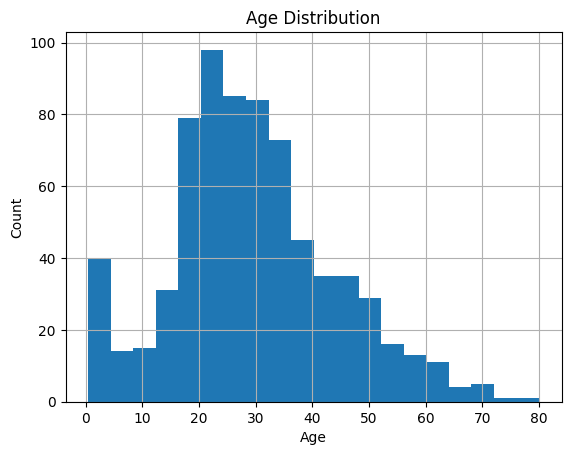

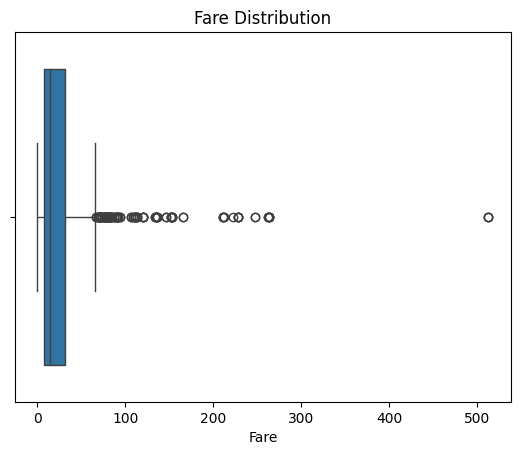

In [13]:
# Histogram
df['Age'].hist(bins=20)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

# Boxplot
sns.boxplot(x=df['Fare'])
plt.title('Fare Distribution')
plt.show()

Survival Count by Gender – how many males and females survived or not.

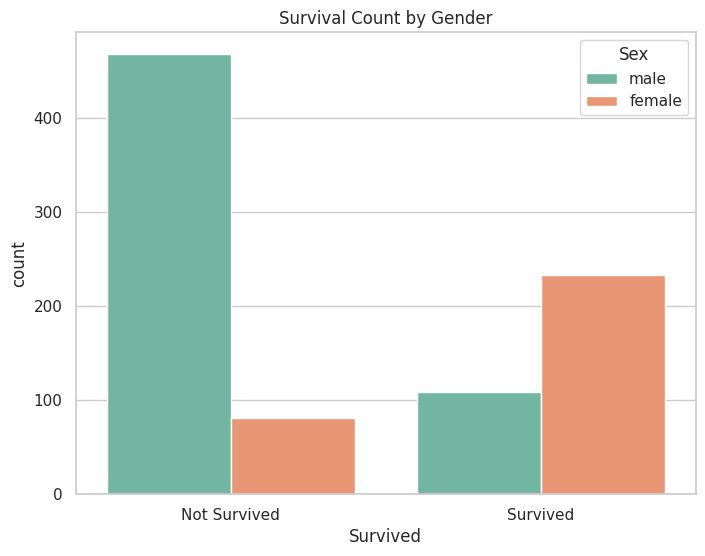

In [15]:
# Set style
sns.set(style="whitegrid")

# 1. Countplot of Survival by Sex
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='Survived', hue='Sex', palette='Set2')
plt.title("Survival Count by Gender")
plt.xticks([0, 1], ['Not Survived', 'Survived'])
plt.show()

Age Distribution – histogram split by survival status.

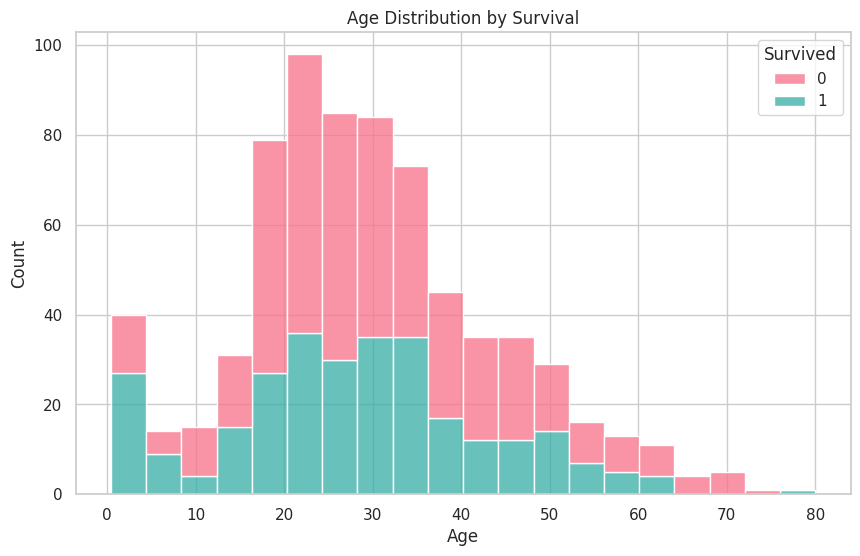

In [16]:
# 2. Age Distribution by Survival
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='Age', hue='Survived', multiple='stack', palette='husl')
plt.title("Age Distribution by Survival")
plt.show()

Fare vs Pclass Boxplot – fare range across travel classes.

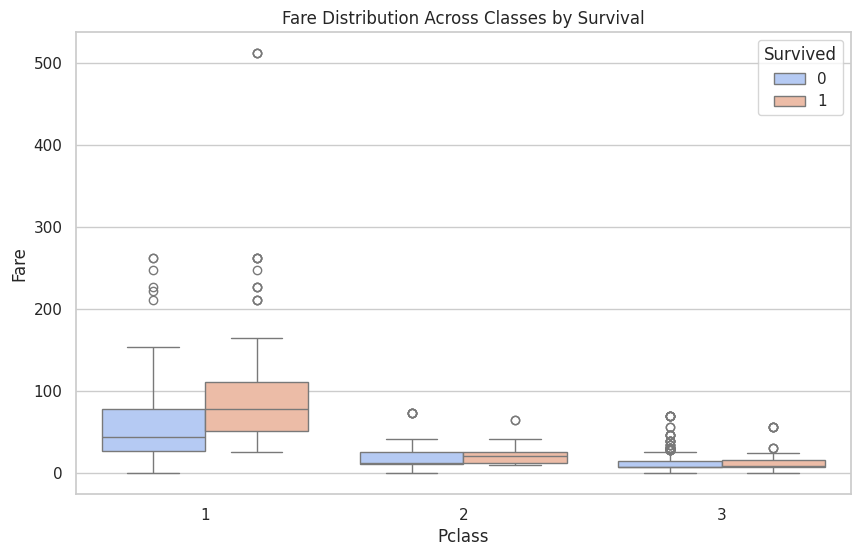

In [17]:
# 3. Fare vs. Pclass Colored by Survival
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Pclass', y='Fare', hue='Survived', palette='coolwarm')
plt.title("Fare Distribution Across Classes by Survival")
plt.show()

Embarked Port Count – passenger counts from C, Q, S.

<ipython-input-18-6b00f819fac8>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Embarked', palette='pastel')


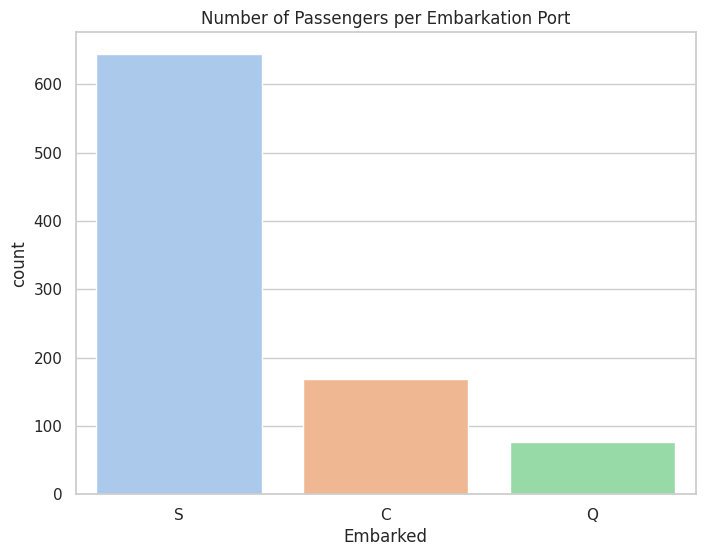

In [18]:
# 4. Count of Passengers Embarked from each Port
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='Embarked', palette='pastel')
plt.title("Number of Passengers per Embarkation Port")
plt.show()

Missing Values Heatmap – visually shows nulls in Age, Cabin, etc.

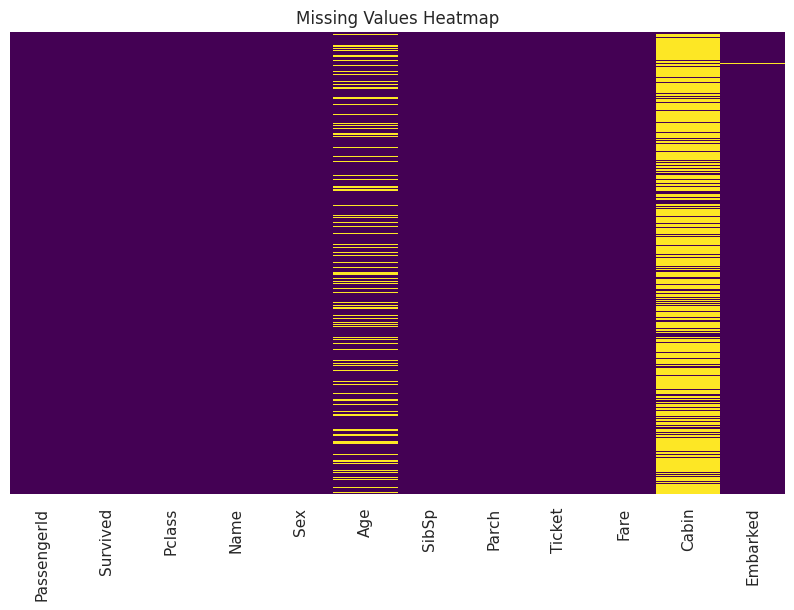

In [19]:
# 5. Heatmap of Missing Values
plt.figure(figsize=(10, 6))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis', yticklabels=False)
plt.title("Missing Values Heatmap")
plt.show()

## Bivariate Analysis

In [21]:
# Drop rows with missing values for accurate correlation and pairplot
df_clean = df[['Age', 'Fare', 'Pclass', 'Survived']].dropna()

<ipython-input-22-75d0c702aa32>:7: UserWarning: Glyph 128279 (\N{LINK SYMBOL}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128279 (\N{LINK SYMBOL}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


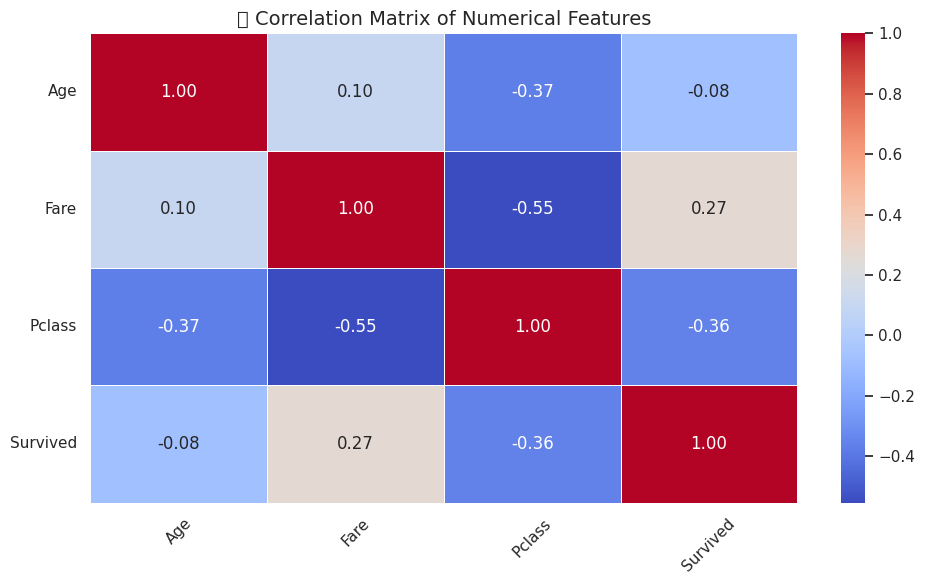

In [22]:
# 🔷 1. Correlation Heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(df_clean.corr(), annot=True, fmt=".2f", cmap='coolwarm', linewidths=0.5)
plt.title('🔗 Correlation Matrix of Numerical Features', fontsize=14)
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


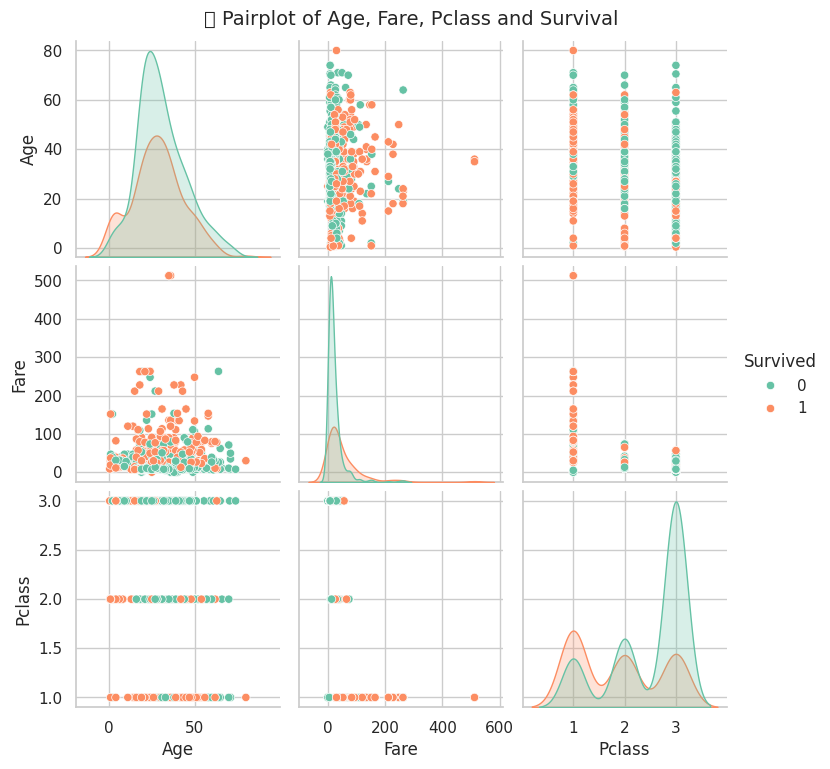

In [23]:
# 🔶 2. Pairplot
sns.pairplot(df_clean, hue='Survived', palette='Set2', diag_kind='kde')
plt.suptitle('📊 Pairplot of Age, Fare, Pclass and Survival', y=1.02, fontsize=14)
plt.show()

## Categorical Features Analysis

Frequency of each category in Sex, Embarked, Pclass.

Survival distribution across gender and class.

<ipython-input-24-a18fb7179797>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Sex', palette='pastel')
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128104 (\N{MAN}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 129456 (\N{EMOJI COMPONENT RED HAIR}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


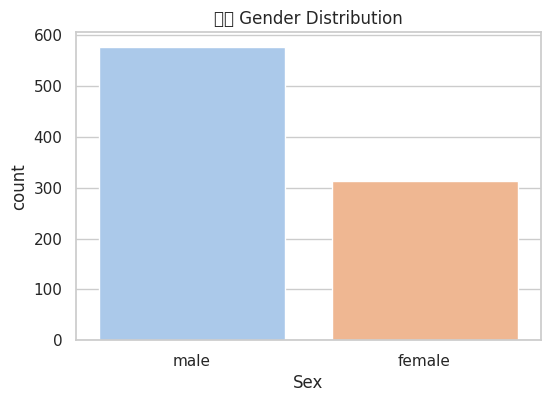

In [24]:
# 1. Countplot: Gender distribution
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='Sex', palette='pastel')
plt.title('👨‍🦰 Gender Distribution')
plt.show()

<ipython-input-25-131b6b839b15>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Embarked', palette='muted')
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128674 (\N{SHIP}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


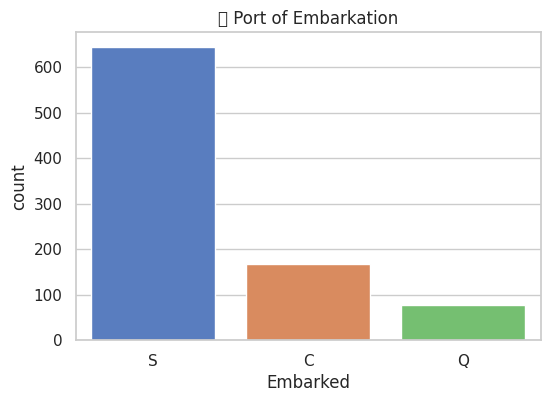

In [25]:
# 2. Countplot: Embarked port distribution
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='Embarked', palette='muted')
plt.title('🚢 Port of Embarkation')
plt.show()

<ipython-input-26-9de677d84b50>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Pclass', palette='coolwarm')
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 127915 (\N{TICKET}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


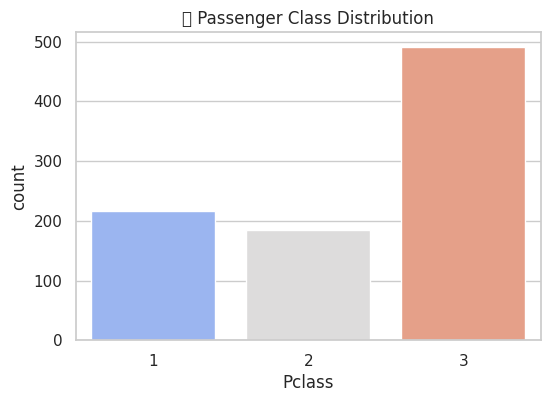

In [26]:
# 3. Countplot: Class distribution
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='Pclass', palette='coolwarm')
plt.title('🎫 Passenger Class Distribution')
plt.show()

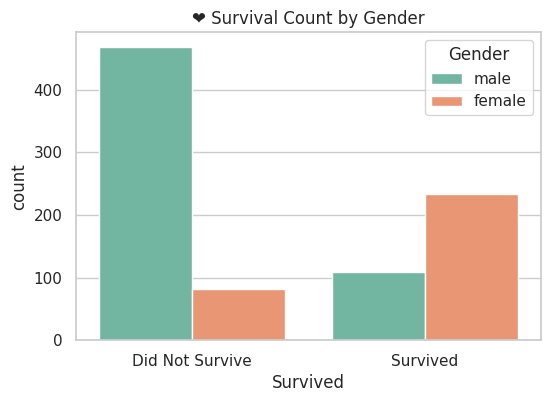

In [27]:
# 4. Survival rate by gender
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='Survived', hue='Sex', palette='Set2')
plt.title('❤️ Survival Count by Gender')
plt.legend(title='Gender')
plt.xticks([0, 1], ['Did Not Survive', 'Survived'])
plt.show()

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128755 (\N{PASSENGER SHIP}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


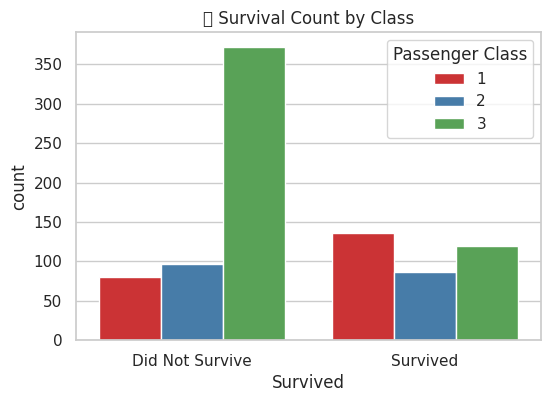

In [28]:
# 5. Survival rate by class
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='Survived', hue='Pclass', palette='Set1')
plt.title('🛳️ Survival Count by Class')
plt.legend(title='Passenger Class')
plt.xticks([0, 1], ['Did Not Survive', 'Survived'])
plt.show()

### Detect Anomalies / Outliers

## 1. Boxplot Method (Visual)




Visual inspection of spread

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128230 (\N{PACKAGE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


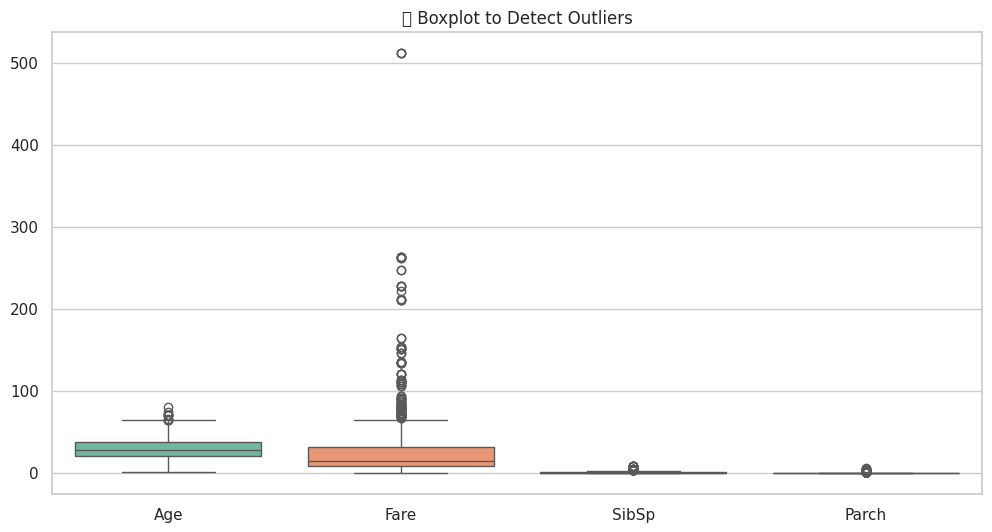

In [29]:
# Boxplot for numerical features
plt.figure(figsize=(12, 6))
sns.boxplot(data=df[['Age', 'Fare', 'SibSp', 'Parch']], palette="Set2")
plt.title("📦 Boxplot to Detect Outliers")
plt.show()

## 2. Z-Score Method (Statistical)

	Standardized anomaly detection

In [34]:
from scipy import stats
import numpy as np

# Calculate Z-scores
z_scores = np.abs(stats.zscore(df[['Age', 'Fare']].dropna()))
threshold = 3

# Identify rows with Z-score > threshold
outliers = (z_scores > threshold).any(axis=1)
print(f"Number of outliers: {outliers.sum()}")

# Optional: view outlier rows
df_outliers = df[['Age', 'Fare']].dropna()[outliers]
print(df_outliers)

Number of outliers: 20
      Age      Fare
27   19.0  263.0000
88   23.0  263.0000
118  24.0  247.5208
258  35.0  512.3292
299  50.0  247.5208
311  18.0  262.3750
341  24.0  263.0000
377  27.0  211.5000
380  42.0  227.5250
438  64.0  263.0000
630  80.0   30.0000
679  36.0  512.3292
689  15.0  211.3375
700  18.0  227.5250
716  38.0  227.5250
730  29.0  211.3375
737  35.0  512.3292
742  21.0  262.3750
779  43.0  211.3375
851  74.0    7.7750


## 3. IQR Method (Statistical)

	Robust to non-normal distributions

In [32]:
Q1 = df['Fare'].quantile(0.25)
Q3 = df['Fare'].quantile(0.75)
IQR = Q3 - Q1

# Define bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Detect outliers
fare_outliers = df[(df['Fare'] < lower_bound) | (df['Fare'] > upper_bound)]
print(f"Number of Fare outliers: {fare_outliers.shape[0]}")

Number of Fare outliers: 116
